In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, max_error, mean_squared_error, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

import keras

import plotly.express as px

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [26]:
df = pd.read_csv("./student_depression_dataset.csv", nrows=1000)


In [27]:
df.replace('?', 0, inplace=True)
df.drop(["id","Work Pressure","Family History of Mental Illness", "Degree", "Study Satisfaction", "Sleep Duration", "Dietary Habits","Gender","Age","City","Profession","CGPA","Job Satisfaction","Work/Study Hours"], axis=1, inplace=True)
Oenc = OrdinalEncoder()
df[["Have you ever had suicidal thoughts ?"]] = Oenc.fit_transform(df[["Have you ever had suicidal thoughts ?" ]])
df

,Academic Pressure,Have you ever had suicidal thoughts ?,Financial Stress,Depression
0,5.0,1.0,1.0,1
1,2.0,0.0,2.0,0
2,3.0,0.0,1.0,0
3,3.0,1.0,5.0,1
4,4.0,1.0,1.0,0
...,...,...,...,...
995,4.0,1.0,3.0,0
996,3.0,1.0,5.0,1
997,4.0,0.0,1.0,0
998,3.0,0.0,1.0,0


<Axes: >

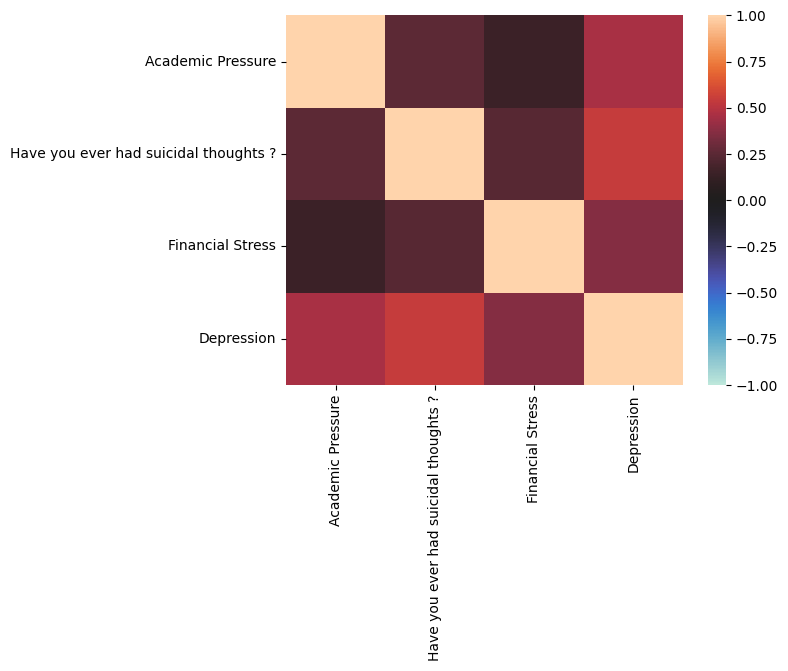

In [28]:
sns.heatmap(df.corr(), vmin=-1, center=0, vmax=1) 

In [29]:
train,validation, test = np.split(df, [int(.7*len(df)), int(.9*len(df))])


In [30]:
train

,Academic Pressure,Have you ever had suicidal thoughts ?,Financial Stress,Depression
0,5.0,1.0,1.0,1
1,2.0,0.0,2.0,0
2,3.0,0.0,1.0,0
3,3.0,1.0,5.0,1
4,4.0,1.0,1.0,0
...,...,...,...,...
695,5.0,1.0,4.0,1
696,4.0,0.0,5.0,1
697,5.0,1.0,4.0,1
698,2.0,1.0,5.0,1


In [31]:
validation 

,Academic Pressure,Have you ever had suicidal thoughts ?,Financial Stress,Depression
700,5.0,0.0,5.0,0
701,5.0,1.0,5.0,1
702,2.0,1.0,2.0,1
703,4.0,0.0,4.0,1
704,4.0,1.0,1.0,0
...,...,...,...,...
895,3.0,0.0,1.0,0
896,5.0,1.0,1.0,1
897,1.0,1.0,5.0,0
898,5.0,0.0,2.0,1


In [32]:
test

,Academic Pressure,Have you ever had suicidal thoughts ?,Financial Stress,Depression
900,4.0,1.0,4.0,1
901,3.0,1.0,4.0,1
902,2.0,1.0,1.0,1
903,4.0,0.0,4.0,1
904,5.0,0.0,2.0,0
...,...,...,...,...
995,4.0,1.0,3.0,0
996,3.0,1.0,5.0,1
997,4.0,0.0,1.0,0
998,3.0,0.0,1.0,0


In [33]:
Y_train = train['Depression']
X_train = train.drop(columns='Depression')

Y_valid = validation['Depression']
X_valid = validation.drop(columns='Depression')

Y_test = test['Depression']
X_test = test.drop(columns='Depression')

In [34]:
model_regression_1 = keras.Sequential([
    keras.layers.InputLayer(shape=(3,)),  
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(1)
])


In [35]:
model_regression_1.compile(
    optimizer=keras.optimizers.Adam(),
    loss='mse',
    metrics=['mean_absolute_error', 'r2_score']
)

In [36]:
history = model_regression_1.fit(
    X_train,
    Y_train,
    batch_size=150,
    epochs=300,
    validation_data=(X_valid, Y_valid),
    verbose='auto',
)

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 5.6080 - mean_absolute_error: 2.1139 - r2_score: -21.9543 - val_loss: 4.0708 - val_mean_absolute_error: 1.7832 - val_r2_score: -16.1113
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.5888 - mean_absolute_error: 1.6569 - r2_score: -13.8119 - val_loss: 2.4390 - val_mean_absolute_error: 1.3517 - val_r2_score: -9.2523
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.0971 - mean_absolute_error: 1.2217 - r2_score: -7.8040 - val_loss: 1.3545 - val_mean_absolute_error: 0.9883 - val_r2_score: -4.6935
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1444 - mean_absolute_error: 0.8813 - r2_score: -3.7438 - val_loss: 0.7414 - val_mean_absolute_error: 0.7226 - val_r2_score: -2.1164
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6272 - mean_absolute_error: 0.6560 - r2_score: -1.5801 - val_loss: 0.4925 - val_mean_absolute_error: 0.5940 - val_r2_score: -1.0703
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 

In [37]:
metrics = {'loss': history.history.get('loss'), 'val_loss': history.history.get('val_loss')}
fig = px.line(metrics)
fig.show()

In [38]:
df2 = pd.read_csv("./abalone.csv", nrows=1000)
df2.drop(["Type"], axis=1, inplace=True)
df2

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
...,...,...,...,...,...,...,...,...
995,0.580,0.490,0.130,1.1335,0.5860,0.2565,0.237,9
996,0.590,0.465,0.155,1.1360,0.5245,0.2615,0.275,11
997,0.590,0.470,0.160,1.2060,0.4790,0.2425,0.309,8
998,0.590,0.455,0.145,1.0630,0.5155,0.2445,0.250,8


<Axes: >

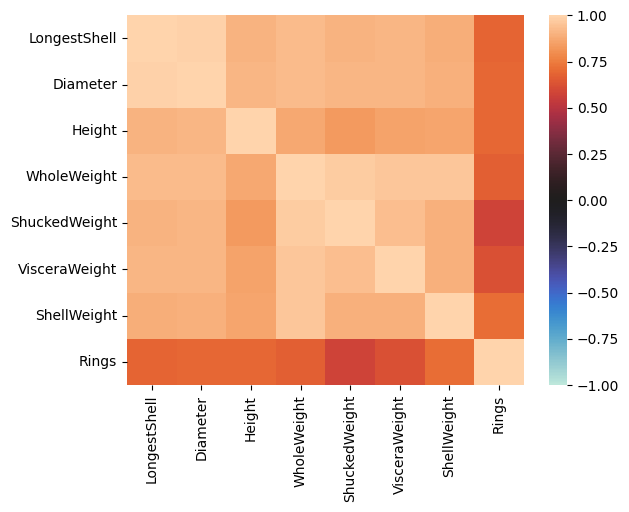

In [39]:
sns.heatmap(df2.corr(), vmin=-1, center=0, vmax=1)

In [40]:
df2 = df2.drop(columns=['ShuckedWeight', 'VisceraWeight'])
train2,validation2, test2 = np.split(df2, [int(.7*len(df2)), int(.9*len(df2))])

train2

,LongestShell,Diameter,Height,WholeWeight,ShellWeight,Rings
0,0.455,0.365,0.095,0.5140,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2100,9
3,0.440,0.365,0.125,0.5160,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0550,7
...,...,...,...,...,...,...
695,0.315,0.230,0.090,0.1285,0.0400,7
696,0.155,0.105,0.050,0.0175,0.0050,4
697,0.280,0.205,0.100,0.1165,0.0300,5
698,0.430,0.335,0.120,0.4440,0.1400,13


In [41]:
Y_train2 = train2['LongestShell']
X_train2 = train2.drop(columns='LongestShell')

Y_valid2 = validation2['LongestShell']
X_valid2 = validation2.drop(columns='LongestShell')

Y_test2 = test2['LongestShell']
X_test2 = test2.drop(columns='LongestShell')

In [42]:
model_classification = keras.Sequential([
    keras. layers.InputLayer(shape=(5,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense (12, activation='relu'),
    keras.layers.Dense (8, activation='relu'),
    keras.layers.Dense (4, activation='relu'),
    keras.layers.Dense (4, activation='relu'),
    keras.layers.Dense (4, activation='relu'),
    keras.layers.Dense (4, activation='relu'),
    keras.layers.Dense (4, activation='relu'),
    keras.layers.Dense (4, activation='relu'),
    keras.layers.Dense (1, activation='sigmoid')
])

model_classification.compile(
    optimizer=keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy', 'f1_score']
)

history_2 = model_classification.fit(
    X_train2,
    Y_train2,
    batch_size=150,
    epochs=300,
    validation_data=(X_valid2, Y_valid2),
    verbose='auto',
)

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.0000e+00 - f1_score: 0.6626 - loss: 0.6927 - val_accuracy: 0.0000e+00 - val_f1_score: 0.6563 - val_loss: 0.6930
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - f1_score: 0.6672 - loss: 0.6924 - val_accuracy: 0.0000e+00 - val_f1_score: 0.6563 - val_loss: 0.6929
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - f1_score: 0.6557 - loss: 0.6912 - val_accuracy: 0.0000e+00 - val_f1_score: 0.6563 - val_loss: 0.6929
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - f1_score: 0.6599 - loss: 0.6904 - val_accuracy: 0.0000e+00 - val_f1_score: 0.6563 - val_loss: 0.6929
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - f1_score: 0.6611 - loss: 0.6894 - val_accuracy: 0.0000e+00 - val_f1_score: 0.6563 - val_loss: 0.6929
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - f1_score: 0.6556 - loss: 0.6878 - val_accurac

In [43]:
metrics_2 = {'loss': history_2.history.get('loss'), 'val_loss': history_2.history.get('val_loss')}
fig = px.line(metrics_2)
fig.show()

In [44]:
Y_pred_1 = model_regression_1.predict(X_test)
Y_pred_2 = model_classification.predict(X_test2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [45]:
Y_test2_binary = (Y_test2 > 0.5).astype(int)  
Y_pred_2_binary = (Y_pred_2 > 0.5).astype(int)

conf_matrix = confusion_matrix(Y_test2_binary, Y_pred_2_binary)
accuracy = accuracy_score(Y_test2_binary, Y_pred_2_binary)
recall = recall_score(Y_test2_binary, Y_pred_2_binary)
precision = precision_score(Y_test2_binary, Y_pred_2_binary)
f1 = f1_score(Y_test2_binary, Y_pred_2_binary)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, F1-score: {f1:.4f}")


Confusion Matrix:
[[61  0]
 [ 6 33]]
Accuracy: 0.9400, Recall: 0.8462, Precision: 1.0000, F1-score: 0.9167


In [46]:
threshold = 0.5
Y_train2_binary = (Y_train2 > threshold).astype(int)
Y_test2_binary = (Y_test2 > threshold).astype(int)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

Y_pred_rfc = RandomForestClassifier().fit(X_train2, Y_train2_binary).predict(X_test2)

conf_matrix = confusion_matrix(Y_test2_binary, Y_pred_rfc)
accuracy = accuracy_score(Y_test2_binary, Y_pred_rfc)
f1 = f1_score(Y_test2_binary, Y_pred_rfc)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}")


Confusion Matrix:
[[59  2]
 [ 6 33]]
Accuracy: 0.9200, F1-score: 0.8919
